In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
column_names = ['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings']
data = pd.read_csv('abalone.data', names=column_names)
print(f'Total number of samples: {len(data)}')
data.head(5) # See samples of raw data

Total number of samples: 4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
# scikit-learn takes only numbers as parameters, so firstly create a binary feature for each of the 3 values
for label in "MFI":
	data[label] = data["sex"] == label
del data["sex"]

# convert age to age group 
for ix in data.index:
	row = data.loc[ix]
	if row.rings <= 8:
		data.loc[ix, 'rings'] = 'young'
	elif row.rings >= 11:
		data.loc[ix, 'rings'] = 'old'
	elif row.rings >= 9 and row.rings <= 10:
		data.loc[ix, 'rings'] = 'medium'

data = data[['length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 
			'viscera weight', 'shell weight', 'M', 'F', 'I', 'rings']]

data.head(5)

,length,diameter,height,whole weight,shucked weight,viscera weight,viscera weight,shell weight,M,F,I,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1010,0.150,True,False,False,old
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0485,0.070,True,False,False,young
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.1415,0.210,False,True,False,medium
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1140,0.155,True,False,False,medium
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0395,0.055,False,False,True,young


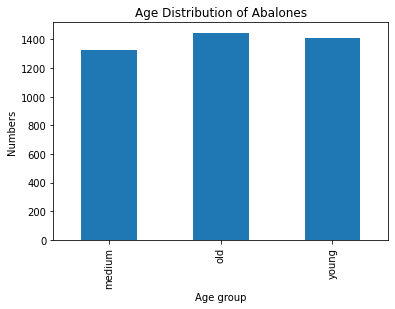

In [6]:
age_group = data.groupby('rings').rings.count()
ax = age_group.plot(kind='bar')
plt.ylabel('Numbers')
plt.xlabel('Age group')
plt.title('Age Distribution of Abalones')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
# first split data to available and in box
x_available, x_inbox, y_available, y_inbox = train_test_split(x, y, test_size=0.2, random_state=1)
# second split data to train and test from available dataset
x_train, x_test, y_train, y_test = train_test_split(x_available, y_available, test_size=0.2, random_state=1)

In [9]:
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn import metrics

In [10]:
from sklearn.neighbors import KNeighborsClassifier
parameters_knn = {'n_neighbors': range(1, 50)}
clf_knn = GridSearchCV(KNeighborsClassifier(), parameters_knn, cv=10)

clf_knn.fit(X=x_train, y=y_train)
knn_model = clf_knn.best_estimator_
print(clf_knn.best_score_, clf_knn.best_params_)

0.6478156967969143 {'n_neighbors': 25}


In [14]:
from prettytable import PrettyTable
models_score = PrettyTable()
models_score.add_column('Method', ['KNN'])
models_score.add_column('Accuracy', [clf_knn.best_score_])
print(models_score)

+--------+--------------------+
| Method |      Accuracy      |
+--------+--------------------+
|  KNN   | 0.6478156967969143 |
+--------+--------------------+


In [18]:
prediction = clf_knn.predict(x_inbox)
print(f'Prediction Acccuracy KNN: {metrics.accuracy_score(prediction, y_inbox)}')

Prediction Acccuracy KNN: 0.6100478468899522
